<a href="https://colab.research.google.com/github/nicolas-sacco/Quantitative-ML-Momentum-Model/blob/main/Quantitative_ML_Momentum_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantitative ML Momentum Model

##Objective: Capitalize on Equities that Display "Momentum" to the Upside & Downside (Long & Short)





##Steps:

1. Get Data: Clean, normalize, and get SPY data in a form that we can feed into our machine learning model
2. Calculate Relative Strength Index, Z-Score and Exponential Moving Average of the S&P 500
3. Develop Algorithm: Create Entry Indicators to Quantify 'Momentum' for Short and Long Positions
4. Analyze Performance: Evaluate performance of our Algorithm using Diagrams of Historical Performance (i.e. matplotlib)



##Explanation of Model

**Momentum investing** is  based on the idea that securities that have performed well in the past will continue to perform well in the future, and those that have performed poorly will continue to perform poorly.

           

The following Momentum Model capitalizes on the tendency for assets that have exhibited strong performance over a recent period to continue performing well, and vice versa. The Model utilizes the **Relative Strength Index (RSI**), **Z-Score** and **Exponential Moving Average (EMA)** to **quantify the 'momentum' in the specified direction**


### **Relative Strength Index (RSI)** - Identify overbought or oversold conditions and potential trend reversals.

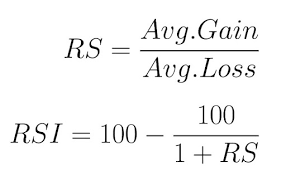

### **Z-Score** - A statistical measure that quantifies the distance (standard deviations) between a data point and the mean of a dataset. It is used to determine how many standard deviations an individual data point is from the mean of the dataset.

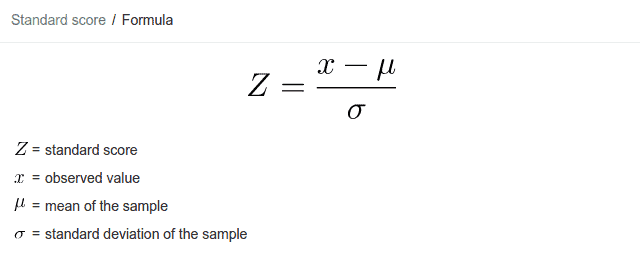

### **Exponential Moving Average (EMA)** - a moving average that places a greater weight and significance on more recent data points, while still considering historical data.

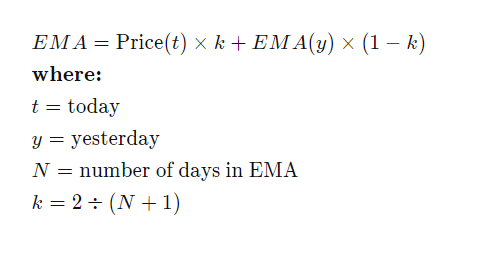



**Long Position Criteria**

---
Relative Strength Index (RSI) : RSI <= 45 (OverSold)

Z-Score : 1 < Z-Score < 1.5 (1std deviation from mean)

Exponential Moving Average (EMA) : Current Price > EMA (Recent Bullish Bias)






**Short Position Criteria**

---
Relative Strength Index (RSI) : RSI >= 65 (OverBought)

Z-Score : -1.5 < Z-Score < -1 (-1std deviation from mean)

Exponential Moving Average (EMA) : Current Price < EMA (Recent Bearish Bias)


### **Importing Neccesary Libraries**

In [ ]:
##import neccesary libraries for the project
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:


spy = yf.download("SPY", start=datetime(2017, 1, 29), end=datetime(2024, 1, 29))
day = np.arange(1, len(spy) + 1)
spy['day'] = day
spy.drop(columns=['Adj Close', 'Volume'], inplace=True)
spy = spy[['day', 'Open', 'High', 'Low', 'Close']]
spy= spy.round(2)
spy=spy.fillna(spy['Close'].mean())
spy.head()


[*********************100%%**********************]  1 of 1 completed


,day,Open,High,Low,Close
Date,,,,,
2017-01-30,1,228.17,228.20,226.41,227.55
2017-01-31,2,226.98,227.60,226.32,227.53
2017-02-01,3,227.53,228.59,226.94,227.62
2017-02-02,4,227.62,228.10,226.82,227.77
2017-02-03,5,228.82,229.55,228.46,229.34


### **Relative Strength Index (RSI)**


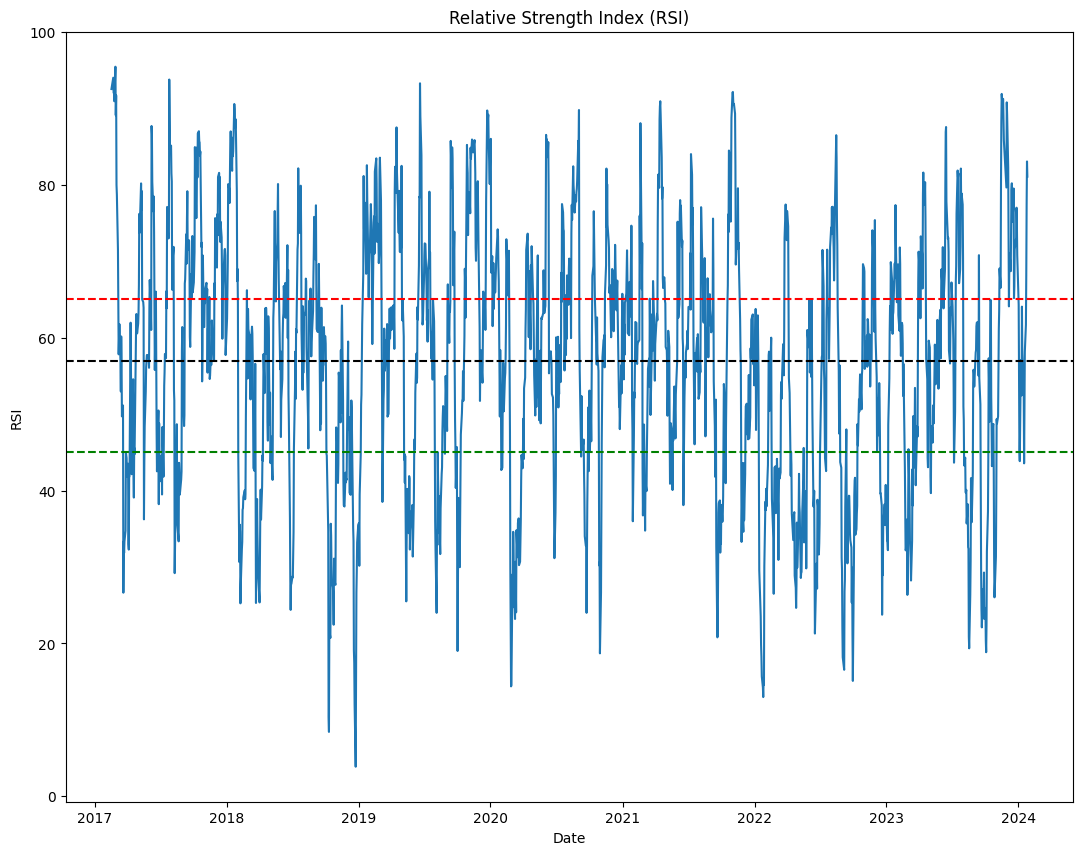

In [ ]:


# Step 1: Calculate RSI
# Calculate the price changes
# Calculate delta (price change)
delta = spy['Close'].diff()

# Separate gains (positive changes) and losses (negative changes)
gain = delta.where(delta > 0, 0).rolling(window=14).mean()
loss = -delta.where(delta < 0, 0).rolling(window=14).mean()

# Calculate the relative strength (RS), handling division by zero
rs = gain / loss
rs[loss == 0] = 0  # Set RS to 0 where loss is 0 to avoid division by zero

# Calculate the RSI using the standard formula
rsi = 100 - (100 / (1 + rs))


# Calculate the Stochastic RSI
stoch_rsi = (rsi - rsi.rolling(window=14).min()) / (rsi.rolling(window=14).max() - rsi.rolling(window=14).min())


# Add RSI and Stochastic RSI columns to the DataFrame
spy['RSI'] = rsi
spy['StochRSI'] = stoch_rsi

# Display DataFrame with new columns
spy.tail(10)

# Create a larger figure
plt.figure(figsize=(13, 10))

# Plot the RSI data
plt.plot(spy['RSI'])


plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.axhline(spy['RSI'].mean(),color='k',ls='--')

plt.axhline(65,color='r',ls='--')  ##short equity indicator
plt.axhline(45,color='g',ls='--')  ##long equity indicator

# Show the plot
plt.show()


### **Z-Score**


In [ ]:
spy['z-score']= ((spy['Close'] - spy['Close'].rolling(window=200).mean())/spy['Close'].rolling(window=200).std()) ##200 day weighted z-score

spy=spy.round(2)
print("maximum z-score value in dataset is:", spy['z-score'].max())
print("minimum z-score value in dataset is:", spy['z-score'].min())
spy.tail(10)

maximum z-score value in dataset is: 2.91
minimum z-score value in dataset is: -4.16


,day,Open,High,Low,Close,RSI,StochRSI,z-score,EMA,RSI Indicator,Z-score Indicator,EMA Indicator,entry
Date,,,,,,,,,,,,,
2024-01-12,1751,477.84,478.60,475.23,476.68,58.07,0.43,1.99,474.94,,,Long,
2024-01-16,1752,475.26,476.61,473.06,474.93,52.51,0.26,1.88,474.94,,,Short,
2024-01-17,1753,471.82,472.79,469.87,472.29,43.56,0.00,1.73,474.18,Long,,Short,
2024-01-18,1754,474.01,477.06,472.42,476.49,49.97,0.20,1.92,474.84,,,Long,
2024-01-19,1755,477.65,482.72,476.54,482.43,58.15,0.54,2.19,477.01,,,Long,
2024-01-22,1756,484.01,485.22,482.78,483.45,61.68,0.87,2.21,478.85,Short,,Long,
2024-01-23,1757,484.01,485.11,482.89,484.86,68.18,1.00,2.25,480.57,Short,,Long,
2024-01-24,1758,487.81,488.77,484.88,485.39,77.43,1.00,2.24,481.95,Short,,Long,
2024-01-25,1759,487.58,488.31,485.39,488.03,83.05,1.00,2.33,483.68,Short,,Long,


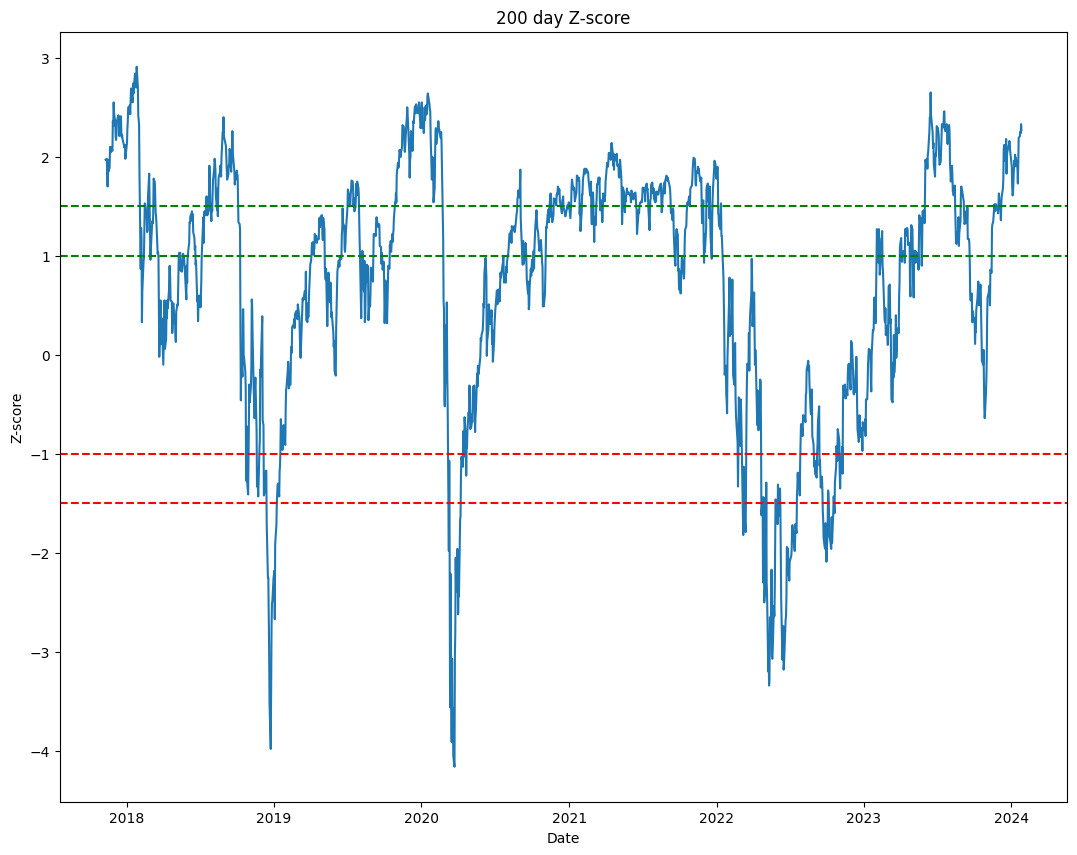

In [ ]:
plt.figure(figsize=(13,10))
plt.plot(spy['z-score'])

plt.axhline(1,color='g',ls='--')  ##range where we long the equity
plt.axhline(1.5,color='g',ls='--')

plt.axhline(-1,color='r',ls='--')  ##range where we short the equity
plt.axhline(-1.5,color='r',ls='--')

plt.xlabel('Date')
plt.ylabel('Z-score')
plt.title('200 day Z-score')

plt.show()

### **Exponential Moving Average (EMA)**

In [ ]:
# Calculate the smoothing factor (alpha) for EMA with a length of 6
alpha = 2 / (6 + 1)

# Calculate the initial EMA value using the mean of the first 6 'Close' prices
initial_ema = spy['Close'].rolling(window=6).mean().iloc[5]

# Initialize an empty list to store EMA values
ema_values = []

# Calculate EMA for each day using the EMA formula
for close_price in spy['Close']:
    if pd.isna(initial_ema):
        ema_values.append(close_price)
    else:
        ema_values.append((close_price * alpha) + (initial_ema * (1 - alpha)))
        initial_ema = ema_values[-1]                                           # Update initial EMA for the next iteration

# Add EMA values as a new column in the DataFrame

spy['EMA'] = ema_values

# Display the DataFrame with the new EMA column

spy['EMA'] = spy['EMA'].round(2)

spy.round(2)
spy.tail(10)

,day,Open,High,Low,Close,RSI,StochRSI,z-score,EMA,RSI Indicator,Z-score Indicator,EMA Indicator,entry
Date,,,,,,,,,,,,,
2024-01-12,1751,477.84,478.60,475.23,476.68,58.07,0.43,1.99,474.94,,,Long,
2024-01-16,1752,475.26,476.61,473.06,474.93,52.51,0.26,1.88,474.94,,,Short,
2024-01-17,1753,471.82,472.79,469.87,472.29,43.56,0.00,1.73,474.18,Long,,Short,
2024-01-18,1754,474.01,477.06,472.42,476.49,49.97,0.20,1.92,474.84,,,Long,
2024-01-19,1755,477.65,482.72,476.54,482.43,58.15,0.54,2.19,477.01,,,Long,
2024-01-22,1756,484.01,485.22,482.78,483.45,61.68,0.87,2.21,478.85,Short,,Long,
2024-01-23,1757,484.01,485.11,482.89,484.86,68.18,1.00,2.25,480.57,Short,,Long,
2024-01-24,1758,487.81,488.77,484.88,485.39,77.43,1.00,2.24,481.95,Short,,Long,
2024-01-25,1759,487.58,488.31,485.39,488.03,83.05,1.00,2.33,483.68,Short,,Long,


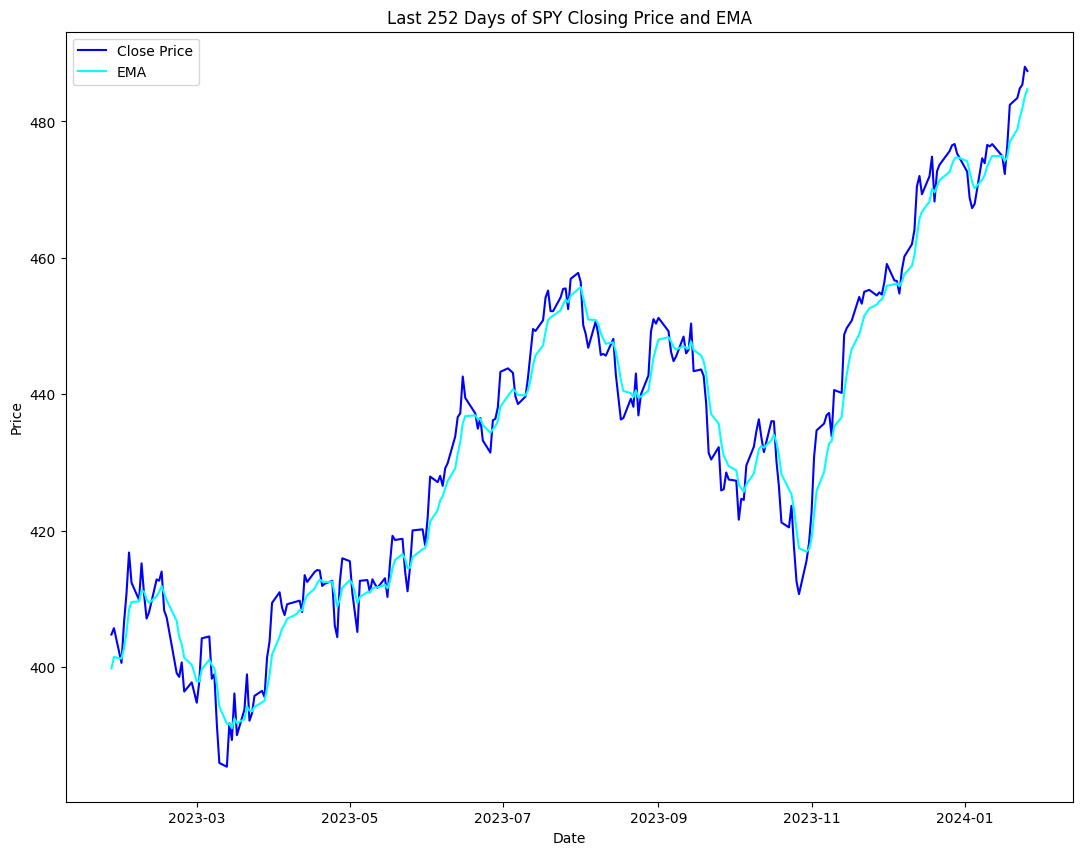

In [ ]:
# Plot the last 252 days of closing price of "SPY" in blue

plt.figure(figsize=(13,10))
plt.plot(spy['Close'][-252:], color="blue", label='Close Price')

# Plot the last 252 days of EMA in green
plt.plot(spy['EMA'][-252:], color="cyan", label='EMA')

# Add legend
plt.legend()

# Add title and labels
plt.title('Last 252 Days of SPY Closing Price and EMA')
plt.xlabel('Date')
plt.ylabel('Price')

# Show plot
plt.show()

### **Indicators for ALL 3 Momentum Metrics**


Indicators for the RSI , Z-Score and EMA

In [ ]:
##rsi inidcator

bull_rsi_condition = spy['RSI'] <= 45 ##bullish condition
spy['RSI Indicator'] = ''
spy.loc[bull_rsi_condition, 'RSI Indicator'] = 'Long'

bear_rsi_condition=spy['RSI'] >= 60  ##bearish condition
spy.loc[bear_rsi_condition, 'RSI Indicator'] = 'Short'

print(spy['RSI Indicator'].value_counts())
spy=spy.round(2)

##z-score indicator

bull_zscore_condition= (spy['z-score']<= 1.6) & (spy['z-score']>=1) ##bullish condition
spy['Z-score Indicator']=''
spy.loc[bull_zscore_condition,'Z-score Indicator']= 'Long'

bear_zscore_condition=(spy['z-score']<=-1) & (spy['z-score']>=-1.5) ##bearish condition
spy.loc[bear_zscore_condition,'Z-score Indicator']= 'Short'

print(spy['Z-score Indicator'].value_counts())

spy.tail()

##EMA indicator
bull_ema_condition= (spy['Close']>spy['EMA'])
spy['EMA Indicator']=''
spy.loc[bull_ema_condition, 'EMA Indicator']= 'Long'

bear_ema_condition= (spy['Close']<spy['EMA'])
spy.loc[bear_ema_condition, 'EMA Indicator']= 'Short'

print(spy['EMA Indicator'].value_counts())


spy.tail(10)



Short    802
         514
Long     444
Name: RSI Indicator, dtype: int64
         1313
Long      382
Short      65
Name: Z-score Indicator, dtype: int64
Long     1125
Short     633
            2
Name: EMA Indicator, dtype: int64


,day,Open,High,Low,Close,RSI,StochRSI,z-score,EMA,RSI Indicator,Z-score Indicator,EMA Indicator,entry
Date,,,,,,,,,,,,,
2024-01-12,1751,477.84,478.60,475.23,476.68,58.07,0.43,1.99,474.94,,,Long,
2024-01-16,1752,475.26,476.61,473.06,474.93,52.51,0.26,1.88,474.94,,,Short,
2024-01-17,1753,471.82,472.79,469.87,472.29,43.56,0.00,1.73,474.18,Long,,Short,
2024-01-18,1754,474.01,477.06,472.42,476.49,49.97,0.20,1.92,474.84,,,Long,
2024-01-19,1755,477.65,482.72,476.54,482.43,58.15,0.54,2.19,477.01,,,Long,
2024-01-22,1756,484.01,485.22,482.78,483.45,61.68,0.87,2.21,478.85,Short,,Long,
2024-01-23,1757,484.01,485.11,482.89,484.86,68.18,1.00,2.25,480.57,Short,,Long,
2024-01-24,1758,487.81,488.77,484.88,485.39,77.43,1.00,2.24,481.95,Short,,Long,
2024-01-25,1759,487.58,488.31,485.39,488.03,83.05,1.00,2.33,483.68,Short,,Long,


### **LONG AND SHORT EQUITY INDICATOR**


Indicator to tell when we should go long and short based on the current "momentum"

In [ ]:

spy['entry'] = ''  # Assign a default value to all rows

spy.loc[(spy['Z-score Indicator'] == 'Long') & (spy['RSI Indicator'] == 'Long') & (spy['EMA Indicator'] == 'Long'), 'entry'] = 'LONG'

spy.loc[(spy['Z-score Indicator'] == 'Short') & (spy['EMA Indicator'] == 'Short'), 'entry'] = 'SHORT'


print(spy['entry'].value_counts())





         1715
SHORT      32
LONG       13
Name: entry, dtype: int64


# **Momentum Model Historical Evaluation**

Evaluate the model that we have created and visualize its performance historically

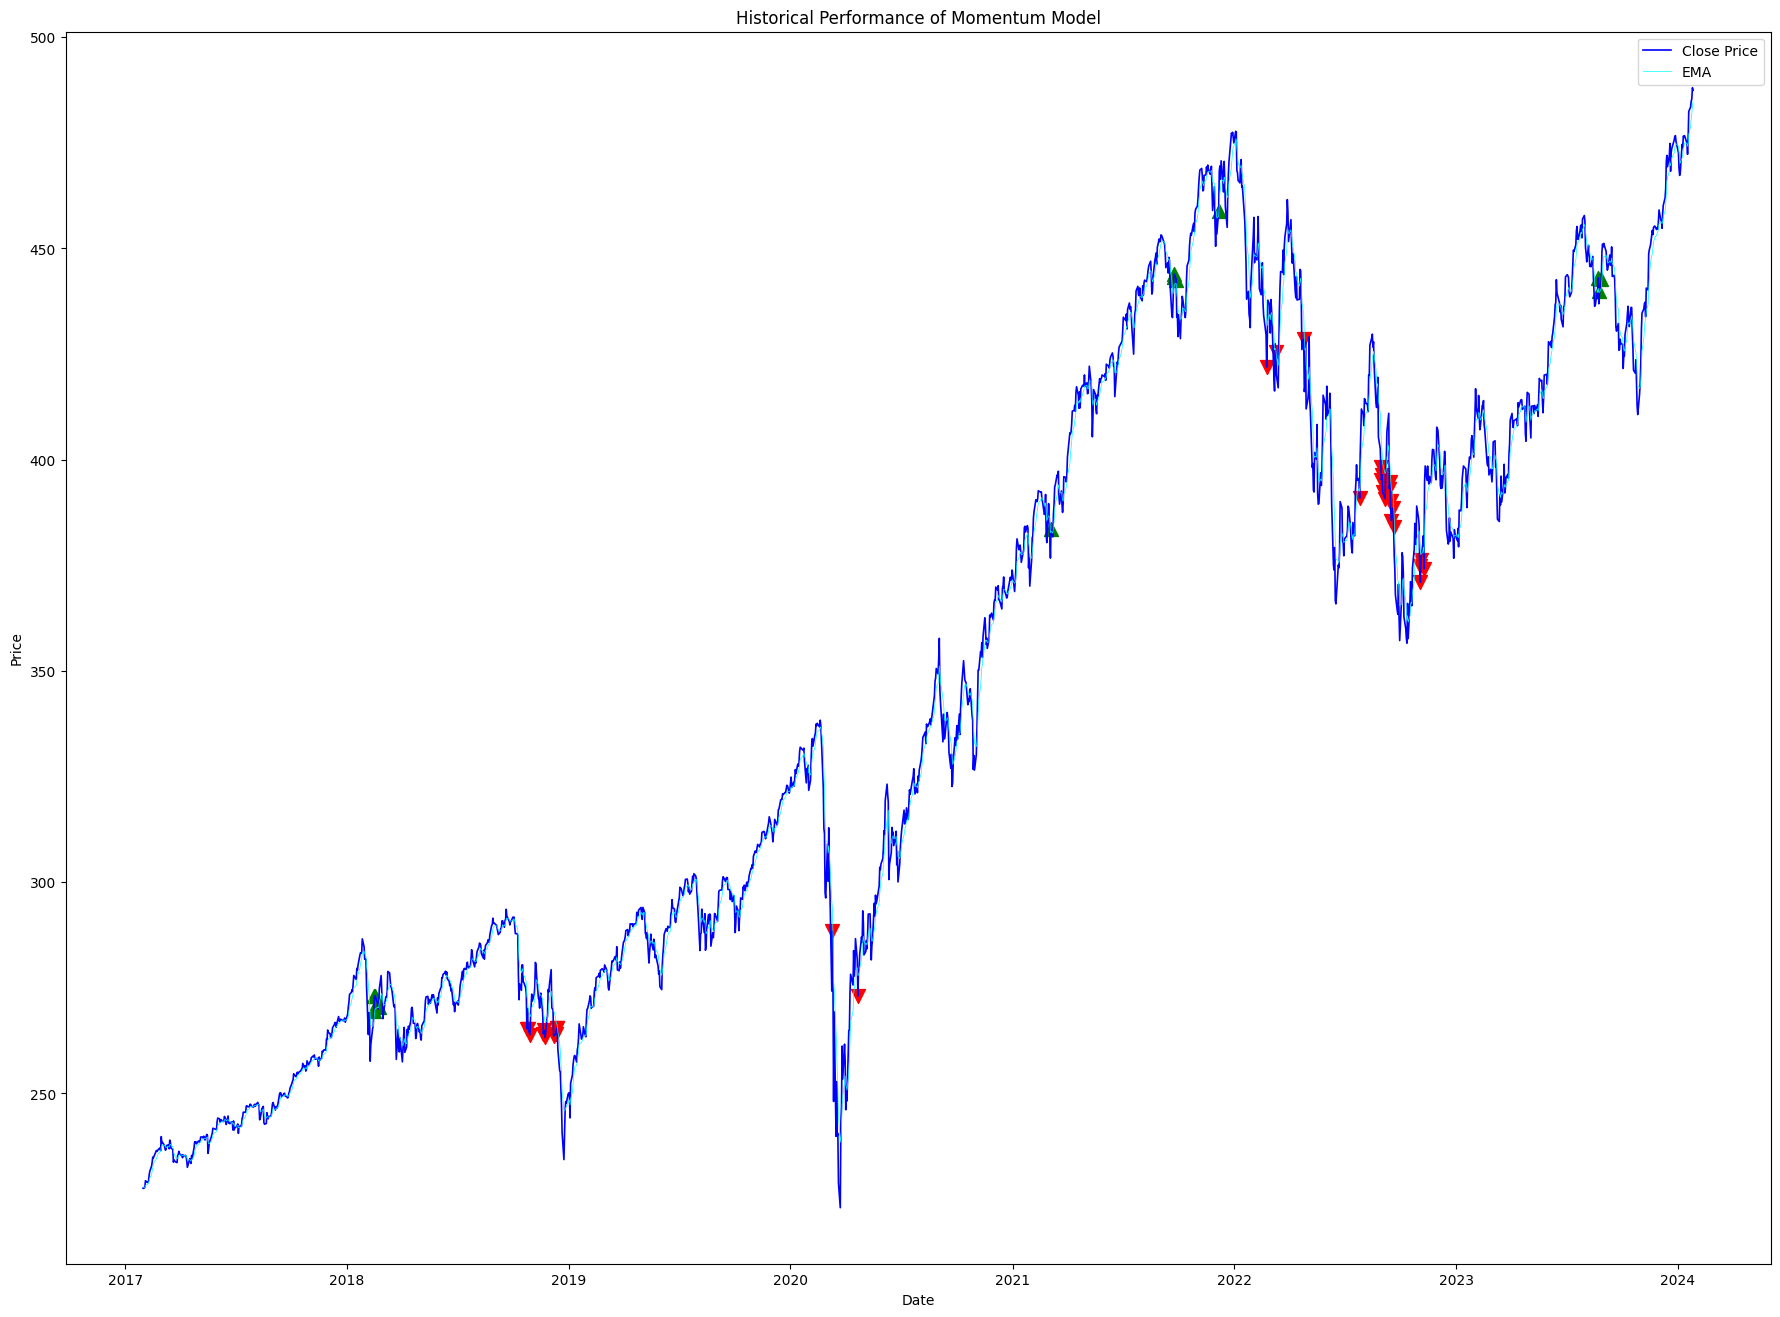

In [ ]:
plt.figure(figsize=(22,16))
plt.plot(spy['Close'], color="blue", label='Close Price',lw=1.2)

# Plot the last 252 days of EMA in green
plt.plot(spy['EMA'], color="cyan", label='EMA',lw=0.5)

# Add legend
plt.legend()

# Add title and labels
plt.title('Historical Performance of Momentum Model')
plt.xlabel('Date')
plt.ylabel('Price')

spy_entry_points = spy[spy['entry'] == 'LONG'].index

##Specify the y position of the scatter plot markers as the 'Close' price at the entry points
plt.scatter(spy_entry_points, spy.loc[spy_entry_points]['Close'], marker='^', color='g', label='Long Entry',s=100)


spy_entry_points = spy[spy['entry'] == 'SHORT'].index

##Specify the y position of the scatter plot markers as the 'Close' price at the entry points
plt.scatter(spy_entry_points, spy.loc[spy_entry_points]['Close'], marker='v', color='r', label='Short Entry',s=100)

# Show plot
plt.show()

### **Momentum Model Evaluation Yearly Basis**

Create subplot for each year to assess the performance more efficiently



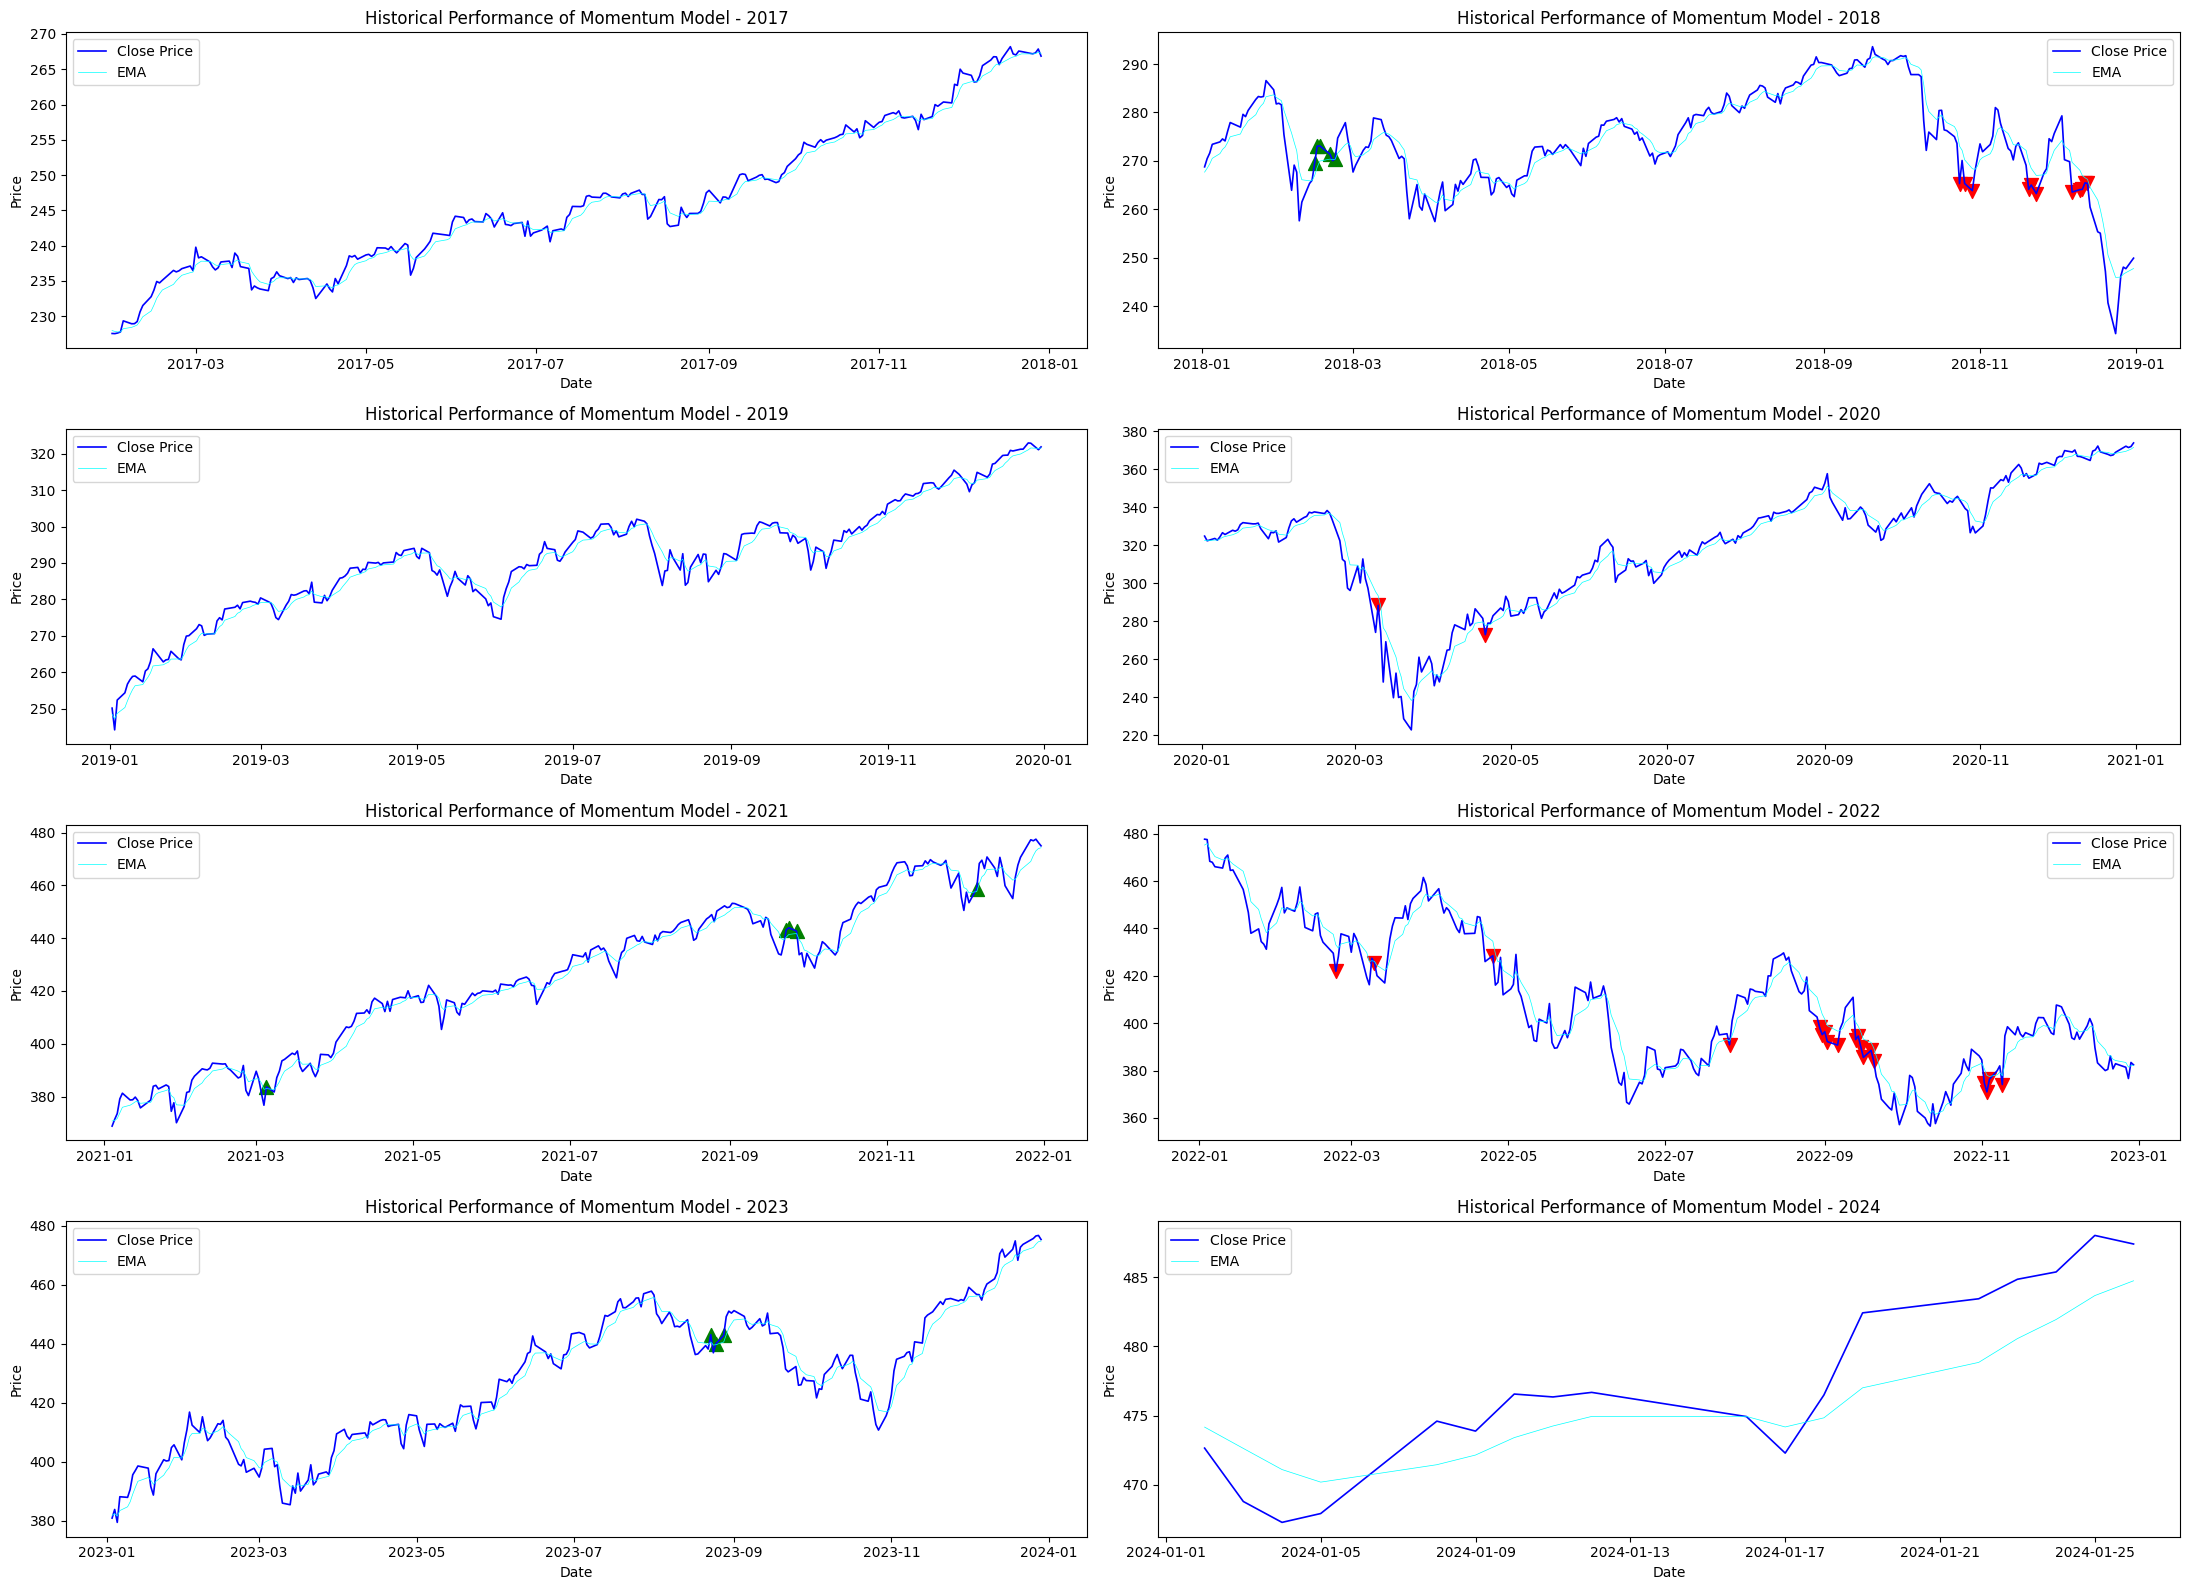

In [ ]:
plt.figure(figsize=(22, 16))

# Create subplots for each year
years = spy.index.year.unique()
num_years = len(years)

# Determine the number of rows and columns for subplots
num_cols = 2  # Assuming 2 columns for the layout
num_rows = (num_years + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a subplot for each year
for i, year in enumerate(years, start=1):
    plt.subplot(num_rows, num_cols, i)  # Adjust subplot dimensions accordingly

    # Filter data for the current year
    spy_year = spy[spy.index.year == year]

    # Plot the 'Close' price for the current year
    plt.plot(spy_year['Close'], color="blue", label='Close Price', lw=1.2)

    # Plot the EMA for the current year
    plt.plot(spy_year['EMA'], color="cyan", label='EMA', lw=0.5)

    # Add legend
    plt.legend()

    # Add title and labels
    plt.title(f'Historical Performance of Momentum Model - {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Identify the entry points for 'LONG'
    spy_entry_points_long = spy_year[spy_year['entry'] == 'LONG'].index
    plt.scatter(spy_entry_points_long, spy_year.loc[spy_entry_points_long]['Close'], marker='^', color='g', label='Long Entry', s=100)

    # Identify the entry points for 'SHORT'
    spy_entry_points_short = spy_year[spy_year['entry'] == 'SHORT'].index
    plt.scatter(spy_entry_points_short, spy_year.loc[spy_entry_points_short]['Close'], marker='v', color='r', label='Short Entry', s=100)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


We can see the algorithm quantifies the momentum of the current trend well; specifically in 2018 we anticipated the big move downwards at the end of the year right before it happened.

Lets evaluate more specifficaly in a **60 day range** to evaluate the model further and to see if we can identify apparent flaws in the model:

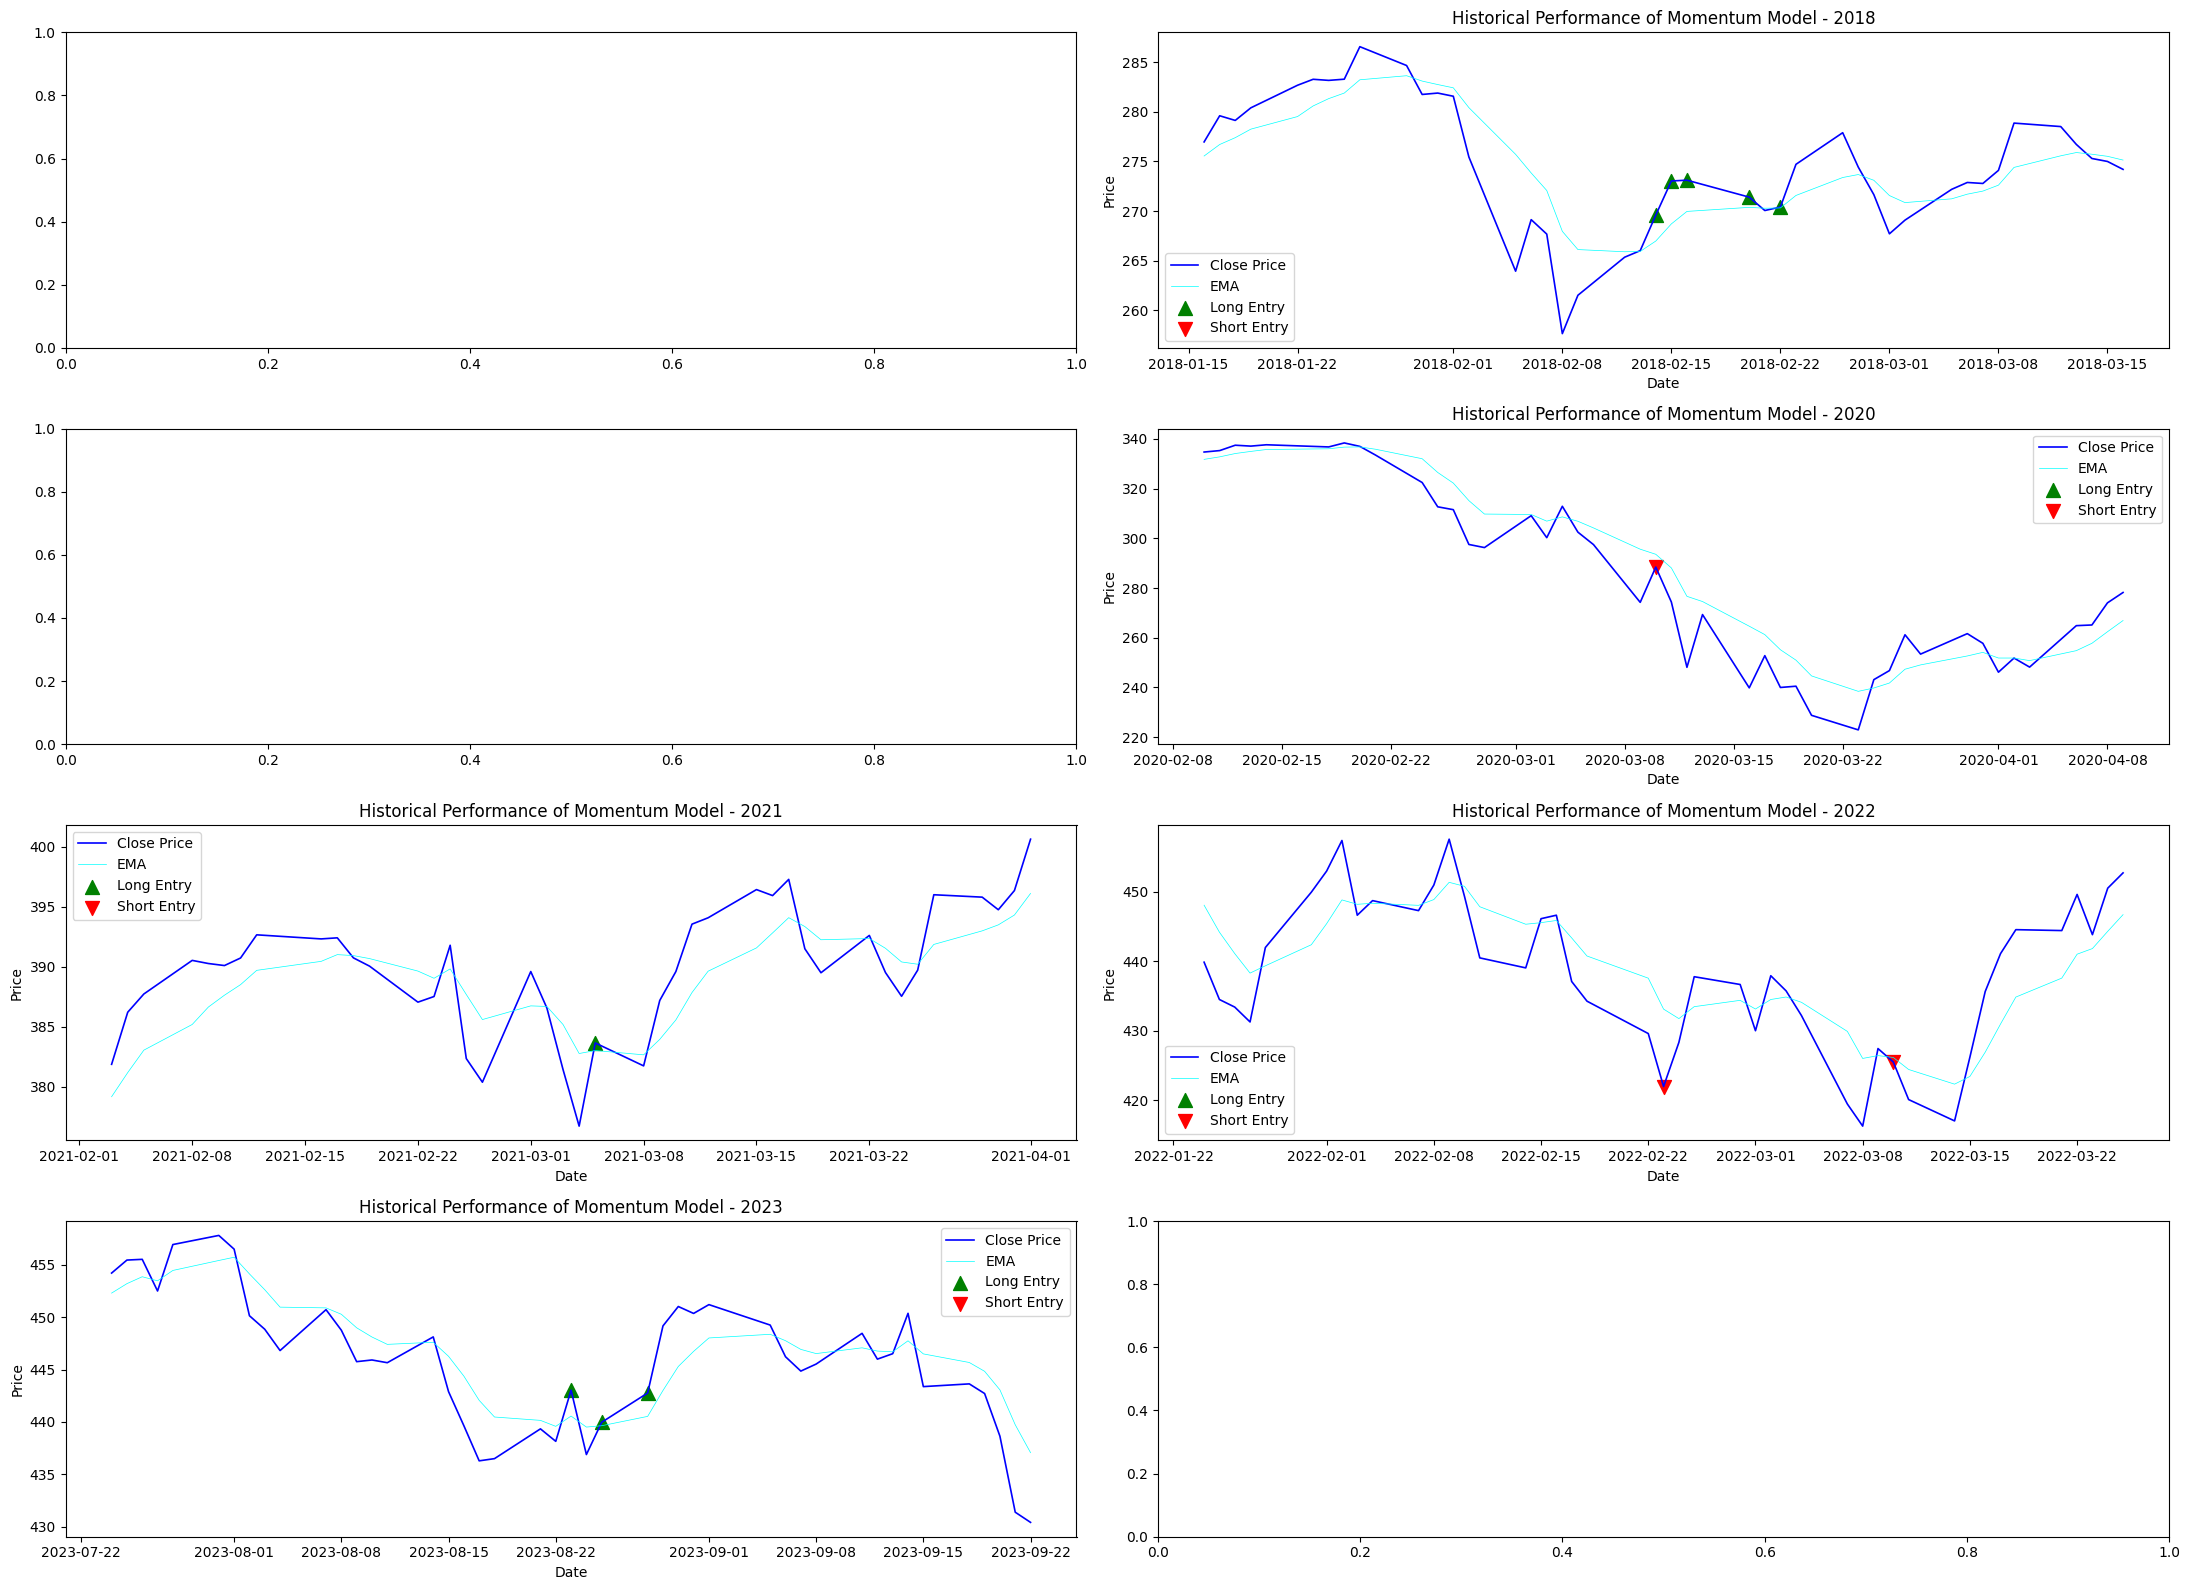

In [ ]:
def plot_year_data(year_data, year):
    plt.plot(year_data['Close'], color="blue", label='Close Price', lw=1.2)
    plt.plot(year_data['EMA'], color="cyan", label='EMA', lw=0.5)

    # Identify the entry points for 'LONG'
    spy_entry_points_long = year_data[year_data['entry'] == 'LONG'].index
    plt.scatter(spy_entry_points_long, year_data.loc[spy_entry_points_long]['Close'], marker='^', color='g', label='Long Entry', s=100)

    # Identify the entry points for 'SHORT'
    spy_entry_points_short = year_data[year_data['entry'] == 'SHORT'].index
    plt.scatter(spy_entry_points_short, year_data.loc[spy_entry_points_short]['Close'], marker='v', color='r', label='Short Entry', s=100)

    plt.title(f'Historical Performance of Momentum Model - {year}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

# Filter data to include only the 60-day range around the indicator activity
def filter_data_by_indicator_activity(data):
    indicator_activity_range = data[(data['entry'] == 'LONG') | (data['entry'] == 'SHORT')].index
    if len(indicator_activity_range) > 0:
        first_activity_date = indicator_activity_range.min()
        start_date = first_activity_date - pd.Timedelta(days=30)
        end_date = first_activity_date + pd.Timedelta(days=30)
        return data[(data.index >= start_date) & (data.index <= end_date)]
    else:
        return None

# Filter and plot data for each year
plt.figure(figsize=(22, 16))
years = spy.index.year.unique()
num_cols = 2
num_rows = (len(years) + num_cols - 1) // num_cols

for i, year in enumerate(years, start=1):
    plt.subplot(num_rows, num_cols, i)
    year_data = spy[spy.index.year == year]
    filtered_data = filter_data_by_indicator_activity(year_data)
    if filtered_data is not None:
        plot_year_data(filtered_data, year)

plt.tight_layout()
plt.show()

Conclusion: The trading strategy seeks to exploit upward/downward momentum in asset prices by employing a combination of technical indicators. When all conditions align, the strategy executes a trade to capture the expected upward/downward momentum. The strategy is succesful at capturing the correct momentum direction but is not as frequent as I would like it to be.

An exit strategy would aid this strategy in generating better returns. This may involve setting profit targets, implementing trailing stops, or reversing the trade when opposite conditions emerge.